# Midterm Notebook 1 Exploring Commuter Data for the City of LA

**_Arturo Jacobo and Miranda Mead-Newton_**

Below we have provided the code for our updated progress on the final project. We've split our midterm code into multiple notebooks. This is the first one. In this notebook, we explore census commuter data for census tracts in the City of LA. 

Here are the libraries we'll use in this notebook

In [1]:
# libraries
import urllib.request, json 
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

We're starting by exploring census data about commuter modes for the City of LA. First, we'll import the data. 

In [2]:
tr = gpd.read_file('data/acs2019_5yr_B08134_14000US06037185320.geojson')

Below, is a basic map of the data which shows that it has a spatial element. 

In [3]:
tr_web_mercator = tr.to_crs(epsg=3857)

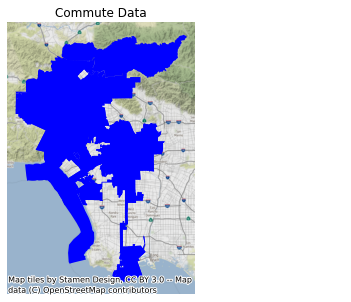

In [4]:
# map it
fig, ax = plt.subplots(figsize=(15,5))

tr_web_mercator.plot(ax=ax, marker='s', color='blue')

ax.axis('off')

ax.set_title('Commute Data')

ctx.add_basemap(ax)

## Cleaning up the dataset

Census data often needs a little editing to be more readable. First we'll take a look at the shape and first few rows of our dataset look like. 

In [5]:
tr.shape

(1005, 243)

In [6]:
tr.head()

geoid                                   name  B08134001  \
0  14000US06037101110  Census Tract 1011.10, Los Angeles, CA     1945.0   
1  14000US06037101122  Census Tract 1011.22, Los Angeles, CA     1757.0   
2  14000US06037101210  Census Tract 1012.10, Los Angeles, CA     2928.0   
3  14000US06037101220  Census Tract 1012.20, Los Angeles, CA     1525.0   
4  14000US06037101300     Census Tract 1013, Los Angeles, CA     1564.0   

   B08134001, Error  B08134002  B08134002, Error  B08134003  B08134003, Error  \
0             257.0       86.0              74.0       82.0              67.0   
1             174.0        9.0              16.0       17.0              20.0   
2             425.0      280.0             202.0      277.0             127.0   
3             183.0       58.0              32.0      151.0              66.0   
4             215.0       57.0              44.0       69.0              53.0   

   B08134004  B08134004, Error  ...  B08134116, Error  B08134117  \
0      115.0              63.0  ...              12.0        1.0   
1       39.0              49.0  ...              12.0        0.0   
2      310.0             146.0  ...              17.0       16.0   
3      221.0              79.0  ...              12.0        0.0   
4      183.0              86.0  ...              12.0        0.0   

   B08134117, Error  B08134118  B08134118, Error  B08134119  B08134119, Error  \
0               2.0        0.0              12.0        0.0              12.0   
1              12.0        0.0              12.0        0.0              12.0   
2              26.0        0.0              17.0        0.0              17.0   
3              12.0        0.0              12.0        0.0              12.0   
4              12.0        0.0              12.0        0.0              12.0   

   B08134120  B08134120, Error  \
0       24.0              35.0   
1        0.0              12.0   
2       30.0              39.0   
3       15.0              21.0   
4        0.0              12.0   

                                            geometry  
0  MULTIPOLYGON (((-118.30229 34.25870, -118.3009...  
1  MULTIPOLYGON (((-118.30334 34.27371, -118.3033...  
2  MULTIPOLYGON (((-118.29945 34.25598, -118.2979...  
3  MULTIPOLYGON (((-118.28593 34.25227, -118.2859...  
4  MULTIPOLYGON (((-118.27822 34.25068, -118.2782...  

[5 rows x 243 columns]

Below, you can see that the last line of our data is a sum of the whole dataset. We'll need to drop this, so that it doesn't skew everything later on. 

In [7]:
tr.tail()

geoid                                   name  B08134001  \
1000  14000US06037980026  Census Tract 9800.26, Los Angeles, CA        5.0   
1001  14000US06037980028  Census Tract 9800.28, Los Angeles, CA        0.0   
1002  14000US06037980031  Census Tract 9800.31, Los Angeles, CA       24.0   
1003  14000US06037990200     Census Tract 9902, Los Angeles, CA        0.0   
1004      16000US0644000                        Los Angeles, CA  1841598.0   

      B08134001, Error  B08134002  B08134002, Error  B08134003  \
1000               8.0        0.0              12.0        0.0   
1001              12.0        0.0              12.0        0.0   
1002              27.0       15.0              26.0        9.0   
1003              12.0        0.0              12.0        0.0   
1004            6239.0   107784.0            2748.0   170859.0   

      B08134003, Error  B08134004  B08134004, Error  ...  B08134116, Error  \
1000              12.0        0.0              12.0  ...              12.0   
1001              12.0        0.0              12.0  ...              12.0   
1002               7.0        0.0              12.0  ...              12.0   
1003              12.0        0.0              12.0  ...              12.0   
1004            2908.0   229791.0            3044.0  ...             362.0   

      B08134117  B08134117, Error  B08134118  B08134118, Error  B08134119  \
1000        0.0              12.0        0.0              12.0        0.0   
1001        0.0              12.0        0.0              12.0        0.0   
1002        0.0              12.0        0.0              12.0        0.0   
1003        0.0              12.0        0.0              12.0        0.0   
1004     9712.0             836.0     3427.0             431.0     3700.0   

      B08134119, Error  B08134120  B08134120, Error  \
1000              12.0        0.0              12.0   
1001              12.0        0.0              12.0   
1002              12.0        0.0              12.0   
1003              12.0        0.0              12.0   
1004             429.0     6317.0             520.0   

                                               geometry  
1000  MULTIPOLYGON (((-118.35173 34.28034, -118.3517...  
1001  MULTIPOLYGON (((-118.45246 33.94315, -118.4464...  
1002  MULTIPOLYGON (((-118.29105 33.75378, -118.2905...  
1003  MULTIPOLYGON (((-118.63598 34.03255, -118.6325...  
1004  MULTIPOLYGON (((-118.66818 34.18987, -118.6681...  

[5 rows x 243 columns]

In [8]:
tr=tr.drop([1004])

In [9]:
tr.tail()

geoid                                   name  B08134001  \
999   14000US06037980024  Census Tract 9800.24, Los Angeles, CA      134.0   
1000  14000US06037980026  Census Tract 9800.26, Los Angeles, CA        5.0   
1001  14000US06037980028  Census Tract 9800.28, Los Angeles, CA        0.0   
1002  14000US06037980031  Census Tract 9800.31, Los Angeles, CA       24.0   
1003  14000US06037990200     Census Tract 9902, Los Angeles, CA        0.0   

      B08134001, Error  B08134002  B08134002, Error  B08134003  \
999               70.0        0.0              12.0       10.0   
1000               8.0        0.0              12.0        0.0   
1001              12.0        0.0              12.0        0.0   
1002              27.0       15.0              26.0        9.0   
1003              12.0        0.0              12.0        0.0   

      B08134003, Error  B08134004  B08134004, Error  ...  B08134116, Error  \
999                7.0       49.0              64.0  ...              12.0   
1000              12.0        0.0              12.0  ...              12.0   
1001              12.0        0.0              12.0  ...              12.0   
1002               7.0        0.0              12.0  ...              12.0   
1003              12.0        0.0              12.0  ...              12.0   

      B08134117  B08134117, Error  B08134118  B08134118, Error  B08134119  \
999         4.0               6.0        0.0              12.0        0.0   
1000        0.0              12.0        0.0              12.0        0.0   
1001        0.0              12.0        0.0              12.0        0.0   
1002        0.0              12.0        0.0              12.0        0.0   
1003        0.0              12.0        0.0              12.0        0.0   

      B08134119, Error  B08134120  B08134120, Error  \
999               12.0        0.0              12.0   
1000              12.0        0.0              12.0   
1001              12.0        0.0              12.0   
1002              12.0        0.0              12.0   
1003              12.0        0.0              12.0   

                                               geometry  
999   MULTIPOLYGON (((-118.51849 34.18389, -118.5184...  
1000  MULTIPOLYGON (((-118.35173 34.28034, -118.3517...  
1001  MULTIPOLYGON (((-118.45246 33.94315, -118.4464...  
1002  MULTIPOLYGON (((-118.29105 33.75378, -118.2905...  
1003  MULTIPOLYGON (((-118.63598 34.03255, -118.6325...  

[5 rows x 243 columns]

Now that that is done, let's rename the columns that we want. Our dataset just includes commute mode information for the number of people who drive to work and the number of people who take the bus to work and how long their commute is. 

In [10]:
columns_to_keep = ['geoid',
                  'name',
                  'B08134001',
                  'B08134021',
                  'B08134022',
                  'B08134023',
                  'B08134024',
                  'B08134025',
                  'B08134026',
                  'B08134027',
                  'B08134028',
                  'B08134029',
                  'B08134030',
                  'B08134071',
                  'B08134072',
                  'B08134073',
                   'B08134074',
                   'B08134075',
                  'B08134076',
                  'B08134077',
                  'B08134078',
                  'B08134079',
                  'B08134080',
                  'geometry']

In [11]:
tr = tr[columns_to_keep]

Below, we rename the columns. `Drove_Solo` is the number of people in each tract who drive to work and `Bus` is number of people who take the bus to work. Then, there is a breakdown by commute time. `D_lt_10` is the number of people who drove who had a commute of less than 10 minutes. `B_25_29` is commute time for bus that was 25-29 minutes. 

In [12]:
tr.columns = ['geoid',
 'name',
 'Total',
 'Drove_Solo',
 'D_lt_10',
 'D_10_14',
 'D_15_19',
 'D_20_24',
 'D_25_29',
 'D_30_34',
 'D_35_44',
 'D_45_59',
 'D_60_om',
 'Bus',
 'B_lt_10',
 'B_10_14',
 'B_15_19',
 'B_20_24',
 'B_25_29',
 'B_30_34',
 'B_35_44',
 'B_45_59',
 'B_60_om',
 'geometry']

Since it's not as useful to look at raw totals, we will want to have a percent of the census tract by mode share. Our data omits other modes so they will not add up to 100 in a tract. 

In [13]:
# create a new column and populate it with normalized data to get the percent of total value
# we are creating new variables
tr['Percent_D_Solo'] = tr['Drove_Solo']/tr['Total']*100
tr['Percent_Bus']= tr['Bus']/tr['Total']*100

In [14]:
list(tr)

['geoid',
 'name',
 'Total',
 'Drove_Solo',
 'D_lt_10',
 'D_10_14',
 'D_15_19',
 'D_20_24',
 'D_25_29',
 'D_30_34',
 'D_35_44',
 'D_45_59',
 'D_60_om',
 'Bus',
 'B_lt_10',
 'B_10_14',
 'B_15_19',
 'B_20_24',
 'B_25_29',
 'B_30_34',
 'B_35_44',
 'B_45_59',
 'B_60_om',
 'geometry',
 'Percent_D_Solo',
 'Percent_Bus']

Here, we are double checking that the percentages showed up. 

In [15]:
tr.head()

geoid                                   name   Total  \
0  14000US06037101110  Census Tract 1011.10, Los Angeles, CA  1945.0   
1  14000US06037101122  Census Tract 1011.22, Los Angeles, CA  1757.0   
2  14000US06037101210  Census Tract 1012.10, Los Angeles, CA  2928.0   
3  14000US06037101220  Census Tract 1012.20, Los Angeles, CA  1525.0   
4  14000US06037101300     Census Tract 1013, Los Angeles, CA  1564.0   

   Drove_Solo  D_lt_10  D_10_14  D_15_19  D_20_24  D_25_29  D_30_34  ...  \
0      1656.0     86.0     26.0    115.0    387.0    156.0    259.0  ...   
1      1617.0      9.0     17.0     39.0    143.0    130.0    378.0  ...   
2      2430.0    266.0    248.0    247.0    434.0    117.0    481.0  ...   
3      1323.0     58.0    121.0    175.0    209.0     29.0    245.0  ...   
4      1457.0     57.0     50.0    183.0    253.0     86.0    257.0  ...   

   B_15_19  B_20_24  B_25_29  B_30_34  B_35_44  B_45_59  B_60_om  \
0      0.0      0.0      0.0     10.0      0.0      0.0     26.0   
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2      0.0      0.0     25.0      0.0      0.0      0.0     43.0   
3     19.0      9.0      0.0      0.0      0.0      0.0     20.0   
4      0.0      0.0      0.0      0.0      0.0      0.0     26.0   

                                            geometry  Percent_D_Solo  \
0  MULTIPOLYGON (((-118.30229 34.25870, -118.3009...       85.141388   
1  MULTIPOLYGON (((-118.30334 34.27371, -118.3033...       92.031873   
2  MULTIPOLYGON (((-118.29945 34.25598, -118.2979...       82.991803   
3  MULTIPOLYGON (((-118.28593 34.25227, -118.2859...       86.754098   
4  MULTIPOLYGON (((-118.27822 34.25068, -118.2782...       93.158568   

   Percent_Bus  
0     1.850900  
1     0.000000  
2     2.322404  
3     3.147541  
4     1.662404  

[5 rows x 26 columns]

## Graphing the Data

Now that we the percentage of people who take the bus and drive in each census tract, we can make some histograms to better understand the data. We'll use plotly to graph our data. 

In [16]:
tr_1 = pd.DataFrame.from_records(tr)

This creates a dataframe that can be read by plotly.

Below are two basic histograms that show the distribution of proportion of bus riders and car drivers, respectably.

In [56]:
fig = px.histogram(tr_1, x="Percent_Bus")
fig.show()

In [55]:
fig = px.histogram(tr_1, x= "Percent_D_Solo")
fig.show()

It would be nice to see this data side by side for a comparison. Below, we've overlaid one dataset on the other in different colors. Orange is percent of bus riders and blue is percent of tract that drives.

In [19]:
x0 = tr_1['Percent_D_Solo']
x1 = tr_1['Percent_Bus']

fig = go.Figure()
fig.add_trace(go.Histogram(x=x0))
fig.add_trace(go.Histogram(x=x1))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.8)
fig.show()

Amping it up a little bit, here's a more complex, custom graph that includes more detail and labels. 

In [20]:
x0 = tr_1['Percent_D_Solo']
x1 = tr_1['Percent_Bus']

fig = go.Figure()
fig.add_trace(go.Histogram(
    x=x0,
    histnorm='percent',
    name='Percent of CT that drive to work', # name used in legend and hover labels
    xbins=dict( # bins used for histogram
        start=0,
        end=100,
        size=1
    ),
    marker_color='#EB89B5',
    opacity=0.75
))
fig.add_trace(go.Histogram(
    x=x1,
    histnorm='percent',
    name='Percent of CT that take the bus',
    xbins=dict(
        start=0,
        end=100,
        size=1
    ),
    marker_color='#330C73',
    opacity=0.75
))

fig.update_layout(
    title_text='Sampled Results', # title of plot
    xaxis_title_text='Percent', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
)

## Mapping the Data

Now, we'll look at our data in map form. Let's start by looking at the census tracts with the most bus commuters.

First, we'll sort the data by bus riders. 

In [42]:
# create new variable tr_sorted
tr_sorted = tr.sort_values(by='Bus',ascending = False)

This is a cloropleth map by bus ridership for the top 1000 census tracts (almost our entire dataset). 

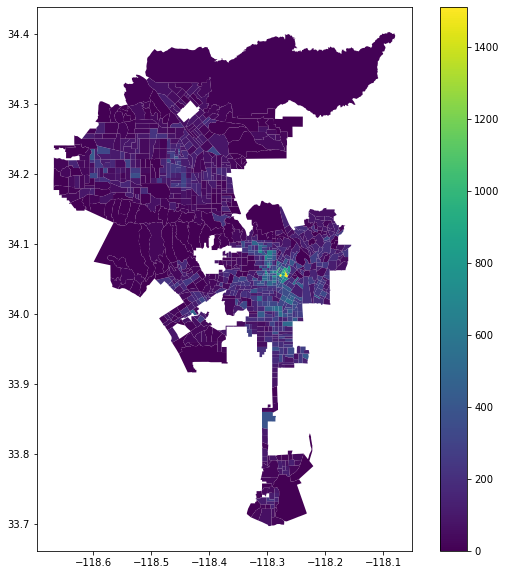

In [51]:
tr_sorted.head(1000).plot(figsize=(10,10),column='Bus',legend=True)

We'll look at the same for those who drive.

In [25]:
tr_sorted = tr.sort_values(by='Drove_Solo',ascending = False)

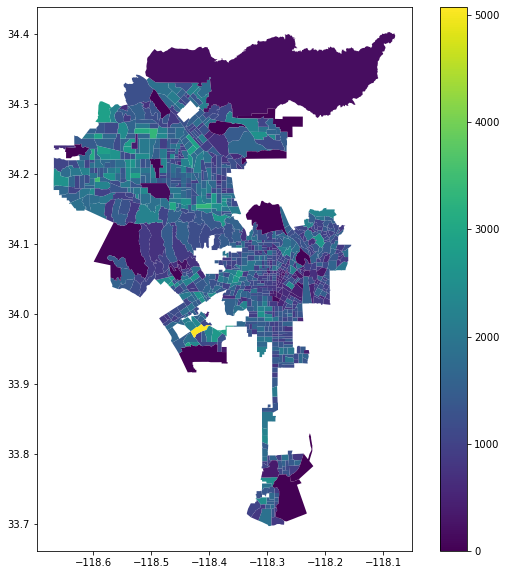

In [57]:
tr_sorted.head(1000).plot(figsize=(10,10),column='Drove_Solo',legend=True)

As you can see, unsurprisingly, there appear to be many more car commuters. There might be an outlier in that one yellow census tract, I'm not sure where that's coming from.

Next, we'll map the percent of bus and car commuters by percentage next to each other. 

Text(0.5, 1.0, 'Percentage of Car Drivers by Census Tract')

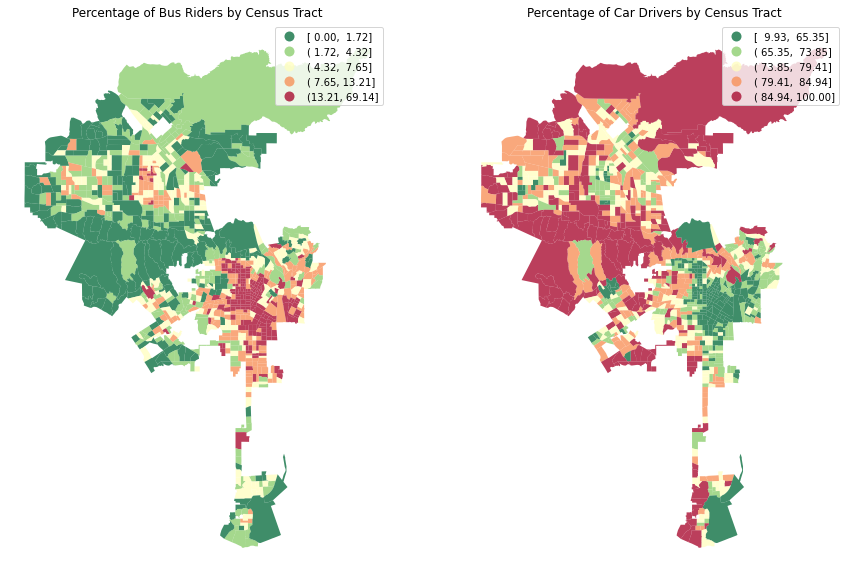

In [35]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs

# regular count map on the left
tr.plot(column='Percent_Bus', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percentage of Bus Riders by Census Tract")

# spatial lag map on the right
tr.plot(column='Percent_D_Solo', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percentage of Car Drivers by Census Tract")

### Add a basemap

Below, we add a base map to the data and look at census tracts with high bus ridership. The basemap gives some perspective of where these census tracts are located within the city.

In [38]:
# reproject to Web Mercator
tr_web_mercator = tr.to_crs(epsg=3857)

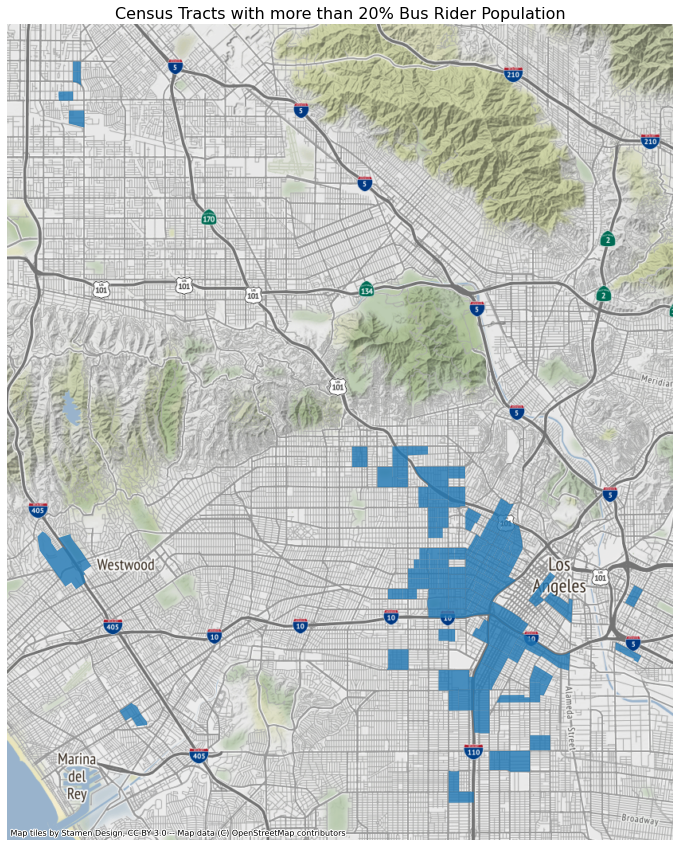

In [39]:
# use subplots that make it easier to create multiple layered maps
fig, ax = plt.subplots(figsize=(15, 15))

# add the layer with ax=ax in the argument 
tr_web_mercator[tr_web_mercator['Percent_Bus'] > 20].plot(ax=ax, alpha=0.8)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Census Tracts with more than 20% Bus Rider Population',fontsize=16)

# add a basemap
ctx.add_basemap(ax)

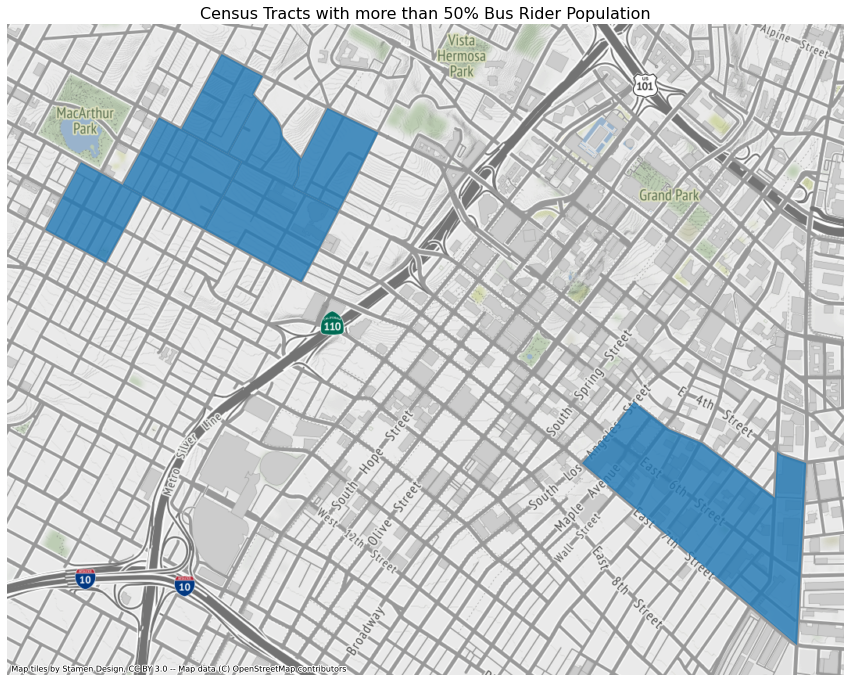

In [40]:
# use subplots that make it easier to create multiple layered maps
fig, ax = plt.subplots(figsize=(15, 15))

# add the layer with ax=ax in the argument 
tr_web_mercator[tr_web_mercator['Percent_Bus'] > 50].plot(ax=ax, alpha=0.8)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Census Tracts with more than 50% Bus Rider Population',fontsize=16)

# add a basemap
ctx.add_basemap(ax)

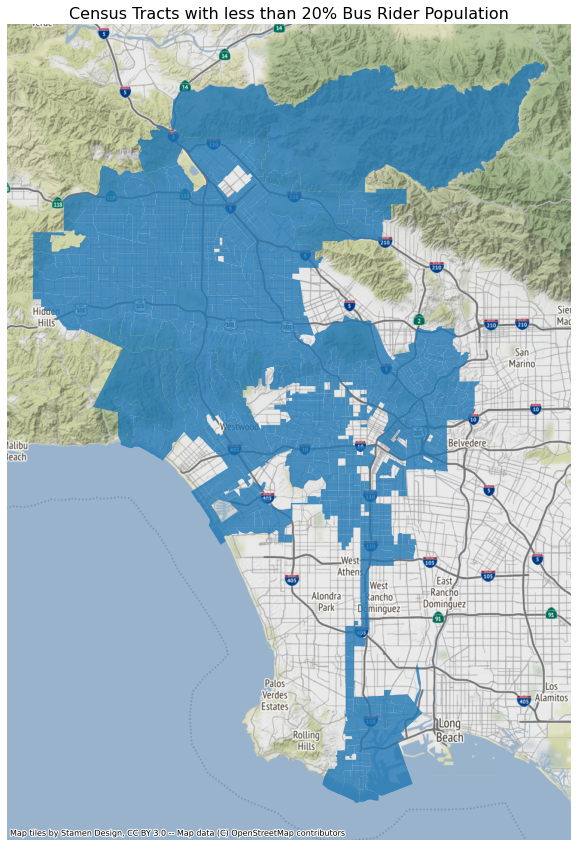

In [41]:
# use subplots that make it easier to create multiple layered maps
fig, ax = plt.subplots(figsize=(15, 15))

# add the layer with ax=ax in the argument 
tr_web_mercator[tr_web_mercator['Percent_Bus'] < 20].plot(ax=ax, alpha=0.8)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Census Tracts with less than 20% Bus Rider Population',fontsize=16)

# add a basemap
ctx.add_basemap(ax)